# Espacio quimico de los compuestos Leadlikeness comparados con los toxicos y contra los farmacos aprobados por la FDA hasta el año 2022.


---
Realizó: Alberto Santiago

In [1]:
from IPython.utils import io
import tqdm.notebook
import os, sys, random
total = 100
with tqdm.notebook.tqdm(total=total) as pbar:
    with io.capture_output() as captured:
      # Instalar rdkit
      !pip -q install rdkit.pypi==2021.9.4
      pbar.update(20)
      # Instalar Pillow
      !pip -q install Pillow
      pbar.update(40)
      # Instalar molplotly
      !pip install molplotly
      pbar.update(60)
      # Instalar jupyter-dash
      !pip install jupyter-dash
      pbar.update(80)
      # Instalar el diseño de aplicación dash
      !pip install dash-bootstrap-components
      pbar.update(100)

  0%|          | 0/100 [00:00<?, ?it/s]

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import dash_bootstrap_components as dbc
from sys import argv

from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

In [3]:
# NOTA: SOLO EN CAS ODE SUBOR ARCHIVOS DESDES DRIVE

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#CARGAR DATOS

Estos datoa tienen el calculo de descriptores moleculares

Posibles nuevos Geroprotectores

In [2]:
url_DATA_G = "/content/drive/MyDrive/INGER/ETAPA 2024/Version Final/8. Espacio quimico/New_geroprotectors.csv"
DATA_NG = pd.read_csv(url_DATA_G, sep=",", encoding='latin1')

In [3]:
DATA_NG

,Name,smiles,Total Molweight,Molweight,Monoisotopic Mass,cLogP,cLogS,H-Acceptors,H-Donors,Total Surface Area,...,sp3-Atoms,Symmetric atoms,Amides,Amines,Alkyl-Amines,Aromatic Amines,Aromatic Nitrogens,Basic Nitrogens,Acidic Oxygens,DataSet
0,"6,6,9a-trimethyl-1H,3H,5H,5aH,6H,7H,8H,9H,9aH,...",OC1OCC2=CCC3C(C)(C)C(O)CCC3(C)C21,252.353,252.353,252.172545,2.0300,-2.548,3,2,183.05,...,16,1,0,0,0,0,0,0,0,Geroprotectors by ML
1,"2-ethyl-4-(hydroxymethyl)-2,3-dihydrofuran-3-one",O=C1C(=COC1CC)CO,142.153,142.153,142.062995,-0.1373,-1.132,3,1,111.09,...,6,0,0,0,0,0,0,0,0,Geroprotectors by ML
2,5-aminopentanamide,O=C(N)CCCCN,116.163,116.163,116.094963,-0.6582,-0.914,3,2,103.33,...,5,0,1,1,1,0,0,1,0,Geroprotectors by ML
3,"1,2-dihydroxy-5-(methylsulfanyl)pent-1-en-3-one",O=C(C(O)=CO)CCSC,162.208,162.208,162.035065,0.0968,-1.469,3,2,125.93,...,6,0,0,0,0,0,0,0,0,Geroprotectors by ML
4,3-hydroxy-5-methylhexanoic acid,O=C(O)CC(O)CC(C)C,146.185,146.185,146.094295,0.7150,-1.300,3,2,120.99,...,8,1,0,0,0,0,0,0,1,Geroprotectors by ML
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,4-chlorocatechol,ClC1=CC=C(O)C(O)=C1,144.557,144.557,143.997807,1.5742,-1.760,2,2,101.38,...,2,0,0,0,0,0,0,0,0,Geroprotectors by ML
1484,3-pyridine aldoxime,ON=CC=1C=NC=CC1,122.127,122.127,122.048013,1.2134,-1.520,3,1,103.13,...,1,0,0,0,0,0,1,0,0,Geroprotectors by ML
1485,tris(methylthio)methane,S(C)C(SC)SC,154.321,154.321,153.994460,1.3945,-3.431,0,0,115.25,...,7,4,0,0,0,0,0,0,0,Geroprotectors by ML
1486,stagonosporyne a,OC1CCC(O)C(O)(C#CC(=C)C)C1,196.245,196.245,196.109945,1.2100,-3.581,3,3,160.55,...,10,0,0,0,0,0,0,0,0,Geroprotectors by ML




Geroprotectores reportados en geroprotectors.org

In [4]:
url_DATA_G = "/content/drive/MyDrive/INGER/ETAPA 2024/Version Final/0. Data Set/Geroprotectors_Clean_Descriptors_2024_smiles.csv"
DATA_GR = pd.read_csv(url_DATA_G, sep="\t")

In [5]:
DATA_GR

,Compound Name,Total Molweight,Monoisotopic Mass,cLogP,cLogS,H-Acceptors,H-Donors,Total Surface Area,Relative PSA,Polar Surface Area,...,Amides,Amines,Alkyl-Amines,Aromatic Amines,Aromatic Nitrogens,Basic Nitrogens,Acidic Oxygens,Geroprotectors,DataSet,Smiles
0,"(R,R)-Cis-Diethyl Tetrahydro-2,8-Chrysenediol",320.431,320.177630,4.8318,-4.116,2,2,246.20,0.106420,40.46,...,0,0,0,0,0,0,0,1,Geroprotectors reported,CC[C@@H]1CC2=C(C=CC(=C2)O)C3=C1C4=C(C[C@H]3CC)...
1,"1,2,3,4,6-Penta-O-Galloyl-B-D-Glucose",940.679,940.118190,1.8357,-3.209,26,15,619.06,0.519660,444.18,...,0,0,0,0,0,0,0,1,Geroprotectors reported,Oc1cc(cc(O)c1O)C(=O)OC[C@H]1O[C@@H](OC(=O)c2cc...
2,10-Hydroxy-2-Decenoic Acid,186.250,186.125595,2.1572,-1.884,3,2,166.77,0.235290,57.53,...,0,0,0,0,0,0,1,1,Geroprotectors reported,C(CCC/C=C/C(=O)O)CCCO
3,1400W,177.250,177.126597,-0.1475,-1.874,3,2,153.05,0.274750,64.40,...,0,1,1,0,0,2,0,1,Geroprotectors reported,CC(=NCC1=CC=CC(=C1)CN)N
4,17-A-Estradiol,272.387,272.177630,3.8766,-4.020,2,2,200.69,0.130550,40.46,...,0,0,0,0,0,0,0,1,Geroprotectors reported,[H][C@]12CC[C@]3(C)[C@H](O)CC[C@@]3([H])[C@]1(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Vitamin B5,219.236,219.110674,-1.0166,-0.467,6,4,168.22,0.456780,106.86,...,1,0,0,0,0,0,1,1,Geroprotectors reported,CC(C)(CO)[C@H](C(=O)NCCC(=O)O)O
202,Vitamin D3,384.645,384.339215,7.6762,-5.995,1,1,324.83,0.040329,20.23,...,0,0,0,0,0,0,0,1,Geroprotectors reported,C[C@H](CCCC(C)C)[C@H]1CC[C@@H]\2[C@@]1(CCC/C2...
203,Wortmannin,428.436,428.147120,1.6247,-4.376,8,0,295.27,0.326040,109.11,...,0,0,0,0,0,0,0,1,Geroprotectors reported,CC(=O)O[C@@H]1C[C@]2([C@@H](CCC2=O)C3=C1[C@]4(...
204,?-Ketoglutarate,146.098,146.021525,-1.2652,-0.396,5,2,106.97,0.610640,91.67,...,0,0,0,0,0,0,2,1,Geroprotectors reported,C(CC(=O)O)C(=O)C(=O)O


Datos de la FDA hasta 2022

In [6]:
# Leer bases de datos
#FDA
url_fda = "https://raw.githubusercontent.com/DIFACQUIM/Cursos/main/Datasets/FDA_2022_july_05_curada.csv"
FDA = pd.read_csv(url_fda)
FDA.head(2)

,ID,SMILES,NEW_SMILES,Data set
0,DB00006,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,CCC(C)C(NC(=O)C(CCC(=O)O)NC(=O)C(CCC(=O)O)NC(=...,FDA
1,DB00007,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...,CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...,FDA


In [7]:
FDA.tail(10)

,ID,SMILES,NEW_SMILES,Data set
2299,DB16165,CCOC1=NC=C(C)C2=C1[C@H](C1=CC=C(C=C1OC)C#N)C(C...,CCOc1ncc(C)c2c1C(c1ccc(C#N)cc1OC)C(C(N)=O)C(C)=N2,FDA
2300,DB16226,CCCCC1(CCCC)CS(=O)(=O)C2=CC=C(C=C2[C@H]([C@H]1...,CCCCC1(CCCC)CS(=O)(=O)c2ccc(N(C)C)cc2C(c2ccc(O...,FDA
2301,DB16261,CCCCC1(CCCC)CN(C2=CC=CC=C2)C2=CC(SC)=C(OCC(=O)...,CCCCC1(CCCC)CN(c2ccccc2)c2cc(SC)c(OCC(=O)NC(C(...,FDA
2302,DB16390,COC1=C(NC2=NC=C(C(=O)OC(C)C)C(=N2)C2=CN(C)C3=C...,C=CC(=O)Nc1cc(N=c2nc(-c3cn(C)c4ccccc34)c(C(=O)...,FDA
2303,DB16625,[H][C@@]12CCC(=O)[C@@]1(C)CC[C@@]1([H])[C@@]2(...,CCCCCCC(=O)OC1CCC2(C)C(=CCC3C4CCC(=O)C4(C)CCC3...,FDA
2304,DB16627,CCOC(=O)[C@H](CC1=CC=C(F)C=C1)NC(=O)[C@@H](N)C...,CCOC(=O)C(Cc1ccc(F)cc1)NC(=O)C(N)Cc1ccc(N(CCCl...,FDA
2305,DB16628,[H][C@@]12COP(O)(=O)O[C@]1([H])C(O)(O)[C@]1([H...,N=c1[nH]c2c(c(=O)[nH]1)NC1C(N2)OC2CO[PH](=O)(=...,FDA
2306,DB16629,[H][C@@]1(CCCCN1C(=O)OC[N+]1=CC=CC(=C1)C(=O)N[...,COC(=O)C(c1ccccc1)C1CCCCN1C(=O)OC[n+]1cccc(C(=...,FDA
2307,DB16703,CC(C)NC(=O)COC1=CC=CC(=C1)C1=NC2=C(C=CC=C2)C(N...,CC(C)NC(=O)COc1cccc(-c2nc(=Nc3ccc4[nH]ncc4c3)c...,FDA
2308,DB16741,[H][C@@]1(OB(O[C@]1([H])[C@H](O)CO)[C@H](CC(C)...,CC(C)CC(NC(=O)C(Cc1ccccc1)NC(=O)c1cnccn1)B1OC(...,FDA


In [8]:
# Ver columnas
print(FDA.columns)
print(DATA_NG.columns)
print(DATA_GR.columns)

Index(['ID', 'SMILES', 'NEW_SMILES', 'Data set'], dtype='object')
Index(['Name', 'smiles', 'Total Molweight', 'Molweight', 'Monoisotopic Mass',
       'cLogP', 'cLogS', 'H-Acceptors', 'H-Donors', 'Total Surface Area',
       'Relative PSA', 'Polar Surface Area', 'Druglikeness', 'Mutagenic',
       'Tumorigenic', 'Reproductive Effective', 'Irritant', 'Shape Index',
       'Molecular Flexibility', 'Molecular Complexity', 'Fragments',
       'Non-H Atoms', 'Non-C/H Atoms', 'Metal-Atoms', 'Electronegative Atoms',
       'Stereo Centers', 'Rotatable Bonds', 'Rings Closures', 'Small Rings',
       'Aromatic Rings', 'Aromatic Atoms', 'sp3-Atoms', 'Symmetric atoms',
       'Amides', 'Amines', 'Alkyl-Amines', 'Aromatic Amines',
       'Aromatic Nitrogens', 'Basic Nitrogens', 'Acidic Oxygens', 'DataSet'],
      dtype='object')
Index(['Compound Name', 'Total Molweight', 'Monoisotopic Mass', 'cLogP',
       'cLogS', 'H-Acceptors', 'H-Donors', 'Total Surface Area',
       'Relative PSA', 'Polar Sur

In [9]:
# Seleccionar columnas
FDA = FDA[['ID', 'NEW_SMILES', 'Data set']]
DATA_NG = DATA_NG[['Name', 'smiles', 'DataSet']]
DATA_GR = DATA_GR[['Compound Name', 'Smiles', 'DataSet']]
# Cambiar nombre a columnas
FDA.columns = ['Name', 'SMILES', 'Data set']
DATA_NG.columns = ['Name', 'SMILES', 'Data set']
DATA_GR.columns = ['Name', 'SMILES', 'Data set']
FDA.head(2)

,Name,SMILES,Data set
0,DB00006,CCC(C)C(NC(=O)C(CCC(=O)O)NC(=O)C(CCC(=O)O)NC(=...,FDA
1,DB00007,CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...,FDA


In [10]:
# Unir (concatenar) bases de datos
DATA = pd.concat([FDA, DATA_NG, DATA_GR], axis=0).reset_index(drop=True)
DATA.head(2)

,Name,SMILES,Data set
0,DB00006,CCC(C)C(NC(=O)C(CCC(=O)O)NC(=O)C(CCC(=O)O)NC(=...,FDA
1,DB00007,CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...,FDA


In [11]:
DATA.tail(10)

,Name,SMILES,Data set
3993,Valproic Acid,CCCC(CCC)C(=O)O,Geroprotectors reported
3994,Valpromide,CCCC(CCC)C(=O)N,Geroprotectors reported
3995,Vincristine Sulfate,CC[C@@]1(C[C@@H]2C[C@@](C3=C(CCN(C2)C1)C4=CC=C...,Geroprotectors reported
3996,Vinpocetine,CC[C@@]12CCCN3[C@@H]1C4=C(CC3)C5=CC=CC=C5N4C(=...,Geroprotectors reported
3997,Vitamin B3,C1=CC(=CN=C1)C(=O)O,Geroprotectors reported
3998,Vitamin B5,CC(C)(CO)[C@H](C(=O)NCCC(=O)O)O,Geroprotectors reported
3999,Vitamin D3,C[C@H](CCCC(C)C)[C@H]1CC[C@@H]\2[C@@]1(CCC/C2...,Geroprotectors reported
4000,Wortmannin,CC(=O)O[C@@H]1C[C@]2([C@@H](CCC2=O)C3=C1[C@]4(...,Geroprotectors reported
4001,?-Ketoglutarate,C(CC(=O)O)C(=O)C(=O)O,Geroprotectors reported
4002,?-Lipoic Acid,C1CSSC1CCCCC(=O)O,Geroprotectors reported


In [12]:
DATA.shape

(4003, 3)

In [13]:
 #Generar descriptores
DATA["HBA"] = [Descriptors.NumHAcceptors(y) if y is not None else 0 for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["HBD"] = [Descriptors.NumHDonors(y) if y is not None else 0 for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["RB"] = [Descriptors.NumRotatableBonds(y) if y is not None else 0 for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["LogP"] = [Descriptors.MolLogP(y) if y is not None else 0 for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["MW"] = [Descriptors.MolWt(y) if y is not None else 0 for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["TPSA"] = [Descriptors.TPSA(y) if y is not None else 0 for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]

[02:40:19] Explicit valence for atom # 7 N, 4, is greater than permitted
[02:40:19] Explicit valence for atom # 9 N, 4, is greater than permitted
[02:40:19] Explicit valence for atom # 7 N, 4, is greater than permitted
[02:40:19] Explicit valence for atom # 8 N, 4, is greater than permitted
[02:40:20] Explicit valence for atom # 7 N, 4, is greater than permitted
[02:40:20] Explicit valence for atom # 9 N, 4, is greater than permitted
[02:40:20] Explicit valence for atom # 7 N, 4, is greater than permitted
[02:40:20] Explicit valence for atom # 8 N, 4, is greater than permitted
[02:40:21] Explicit valence for atom # 7 N, 4, is greater than permitted
[02:40:21] Explicit valence for atom # 9 N, 4, is greater than permitted
[02:40:21] Explicit valence for atom # 7 N, 4, is greater than permitted
[02:40:21] Explicit valence for atom # 8 N, 4, is greater than permitted
[02:40:23] Explicit valence for atom # 7 N, 4, is greater than permitted
[02:40:23] Explicit valence for atom # 9 N, 4, is g

In [ ]:
# Generar descriptores
#DATA["HBA"] = [Descriptors.NumHAcceptors(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
#DATA["HBD"] = [Descriptors.NumHDonors(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
#DATA["RB"] = [Descriptors.NumRotatableBonds(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
#DATA["LogP"] = [Descriptors.MolLogP(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
#DATA["TPSA"] = [Descriptors.TPSA(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
#DATA["MW"] = [Descriptors.MolWt(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]

In [14]:
DATA

,Name,SMILES,Data set,HBA,HBD,RB,LogP,MW,TPSA
0,DB00006,CCC(C)C(NC(=O)C(CCC(=O)O)NC(=O)C(CCC(=O)O)NC(=...,FDA,29,27,66,-8.32610,2180.317,904.07
1,DB00007,CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...,FDA,14,15,32,-1.43810,1209.421,431.54
2,DB00014,CC(C)CC(NC(=O)C(COC(C)(C)C)NC(=O)C(Cc1ccc(O)cc...,FDA,16,17,31,-3.10570,1269.433,495.89
3,DB00027,CC(C)CC(NC(=O)CNC(=O)C(NC=O)C(C)C)C(=O)NC(C)C(...,FDA,16,20,51,4.86760,1811.253,519.89
4,DB00035,N=C(N)NCCCC(NC(=O)C1CCCN1C(=O)C1CSSCCC(=O)NC(C...,FDA,15,14,19,-4.13203,1069.238,435.41
...,...,...,...,...,...,...,...,...,...
3998,Vitamin B5,CC(C)(CO)[C@H](C(=O)NCCC(=O)O)O,Geroprotectors reported,4,4,6,-1.04330,219.237,106.86
3999,Vitamin D3,C[C@H](CCCC(C)C)[C@H]1CC[C@@H]\2[C@@]1(CCC/C2...,Geroprotectors reported,1,1,6,7.61900,384.648,20.23
4000,Wortmannin,CC(=O)O[C@@H]1C[C@]2([C@@H](CCC2=O)C3=C1[C@]4(...,Geroprotectors reported,8,0,3,2.53640,428.437,109.11
4001,?-Ketoglutarate,C(CC(=O)O)C(=O)C(=O)O,Geroprotectors reported,3,2,4,-0.49510,146.098,91.67


In [15]:
dataset = DATA[["Data set", "HBA", "HBD", "RB", "LogP", "TPSA", "MW"]]
dataset

,Data set,HBA,HBD,RB,LogP,TPSA,MW
0,FDA,29,27,66,-8.32610,904.07,2180.317
1,FDA,14,15,32,-1.43810,431.54,1209.421
2,FDA,16,17,31,-3.10570,495.89,1269.433
3,FDA,16,20,51,4.86760,519.89,1811.253
4,FDA,15,14,19,-4.13203,435.41,1069.238
...,...,...,...,...,...,...,...
3998,Geroprotectors reported,4,4,6,-1.04330,106.86,219.237
3999,Geroprotectors reported,1,1,6,7.61900,20.23,384.648
4000,Geroprotectors reported,8,0,3,2.53640,109.11,428.437
4001,Geroprotectors reported,3,2,4,-0.49510,91.67,146.098


In [16]:
#Dividir matriz
data = dataset.iloc[:,1:7].values # Seleccionar columnas con descriptores
label = dataset.iloc[:,0].values # Seleccionar el nombre de la base de datos(label) de las columnas

In [17]:
pd.DataFrame(data).head(2)

,0,1,2,3,4,5
0,29.0,27.0,66.0,-8.3261,904.07,2180.317
1,14.0,15.0,32.0,-1.4381,431.54,1209.421


In [18]:
# Normalizar datos
from sklearn.preprocessing import StandardScaler
data_std = StandardScaler().fit_transform(data)

In [19]:
#ENTRENAR EL MODELO
from sklearn.decomposition import PCA
pca = PCA(n_components=3) #podemos usar una matrix de dos dimenciones o mas, en este caso son tres dimenciones
pca_results = pca.fit_transform(data_std) # se usan los datos estandarizados
pca_results

array([[14.16323047,  0.26229277,  2.26926817],
       [ 6.33156096,  0.5078224 ,  1.19560169],
       [ 7.12314671, -0.04443147,  0.96766191],
       ...,
       [ 0.16198262,  0.43350798, -0.72808099],
       [-0.14393829, -0.91074127,  0.28463469],
       [-0.60682798,  0.24593331,  0.20974024]])

In [20]:
# Seleccionar impormación complementaria
label = DATA[["Data set", "Name", "SMILES"]]
label = label.to_numpy()

In [21]:
# Concatenar arrays de numpy
arr = np.concatenate((label, pca_results), axis = 1)
# Crear un nuevo dataframe
pca_dataset = pd.DataFrame(data=arr, columns = ['Data set',"ID", "SMILES",'component1', 'component2', 'component3'])
pca_dataset.head(2)

,Data set,ID,SMILES,component1,component2,component3
0,FDA,DB00006,CCC(C)C(NC(=O)C(CCC(=O)O)NC(=O)C(CCC(=O)O)NC(=...,14.16323,0.262293,2.269268
1,FDA,DB00007,CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...,6.331561,0.507822,1.195602


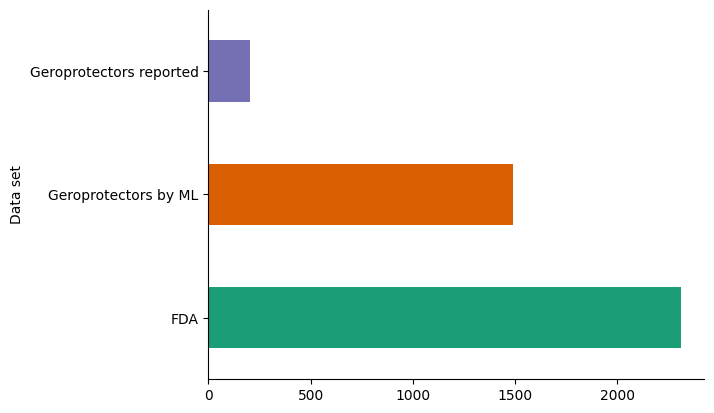

In [22]:
# @title Data set

from matplotlib import pyplot as plt
import seaborn as sns
pca_dataset.groupby('Data set').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-23-5692fd88073a>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Dark2')


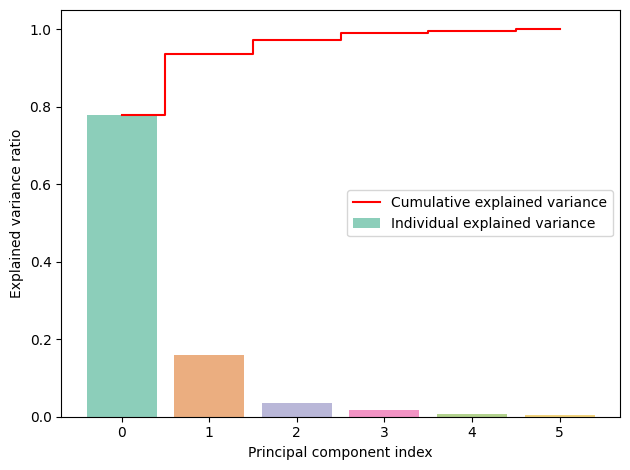

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(data)
X_train_std = sc.transform(data)
#X_test_std = sc.transform(X_test)
# Instantiate PCA
pca = PCA()

# Determine transformed features
X_train_pca = pca.fit_transform(X_train_std)

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
cmap = plt.cm.get_cmap('Dark2')

# Create the visualization plot
import matplotlib.pyplot as plt
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance', color=cmap(np.arange(len(exp_var_pca)) % cmap.N))
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [24]:
pca_dataset.head(2)

,Data set,ID,SMILES,component1,component2,component3
0,FDA,DB00006,CCC(C)C(NC(=O)C(CCC(=O)O)NC(=O)C(CCC(=O)O)NC(=...,14.16323,0.262293,2.269268
1,FDA,DB00007,CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...,6.331561,0.507822,1.195602


In [ ]:
#Seaborn para hacer el gráfico de PCA.

In [25]:
set(list(pca_dataset["Data set"]))

{'FDA', 'Geroprotectors by ML', 'Geroprotectors reported'}

In [26]:
#Graficar
import plotly.express as px
import molplotly
fig_pca = px.scatter(pca_dataset,
                            x='component1',
                            y='component2',
                            #symbol='Minimum Degree',
                            color='Data set',
                            color_discrete_sequence=["hotpink", "springgreen", "mediumpurple"],
                            title='PCA',
                            labels={'PC1': 'PC_1',
                                    'PC2': 'PC_2'},
                            width=700,
                            height=500)
app_marker = molplotly.add_molecules(fig=fig_pca,
                                         df=pca_dataset,
                                         smiles_col='SMILES',
                                         title_col='ID',
                                         color_col='Data set'
                                        )

app_marker.run(port=8060)

/usr/local/lib/python3.11/dist-packages/dash/dash.py:579: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>

In [27]:
import plotly.express as px
import molplotly

fig_pca = px.scatter_3d(pca_dataset,
                        x='component1',
                        y='component2',
                        z='component3',
                        color='Data set',
                        color_discrete_sequence=["hotpink", "springgreen", "mediumpurple"],
                        title='PCA',
                        labels={'PC1': 'PC_1',
                                'PC2': 'PC_2',
                                'PC3': 'PC_3'},
                        width=700,
                        height=500)

fig_pca.update_traces(marker=dict(size=6,  # Adjust marker size as desired
                                  opacity=0.8))  # Adjust marker opacity as desired

fig_pca.show()

In [28]:
import plotly.express as px
import plotly.graph_objs as go

# Genera una lista de colores cualitativos usando Plotly Express
color_list = px.colors.qualitative.Plotly

# Asigna un color a cada categoría en tu conjunto de datos
color_mapping = {
    'categoria1': color_list[0],
    'categoria2': color_list[1],
    'categoria3': color_list[2],
    # Agrega más categorías y colores según sea necesario
}

# Agrega los colores a tu conjunto de datos
pca_dataset['color'] = pca_dataset['Data set'].map(color_mapping)

# Ahora puedes usar los colores en tu gráfico 3D
fig_pca = go.Figure(data=[go.Scatter3d(
                            x=pca_dataset['component1'],
                            y=pca_dataset['component2'],
                            z=pca_dataset['component3'],
                            mode='markers',
                            marker=dict(color=pca_dataset['color'],
                                        colorscale='peach',  # Define la escala de colores aquí
                                        size=5,
                                        line=dict(color='black', width=1)),
                            hovertemplate='ID: %{text}<extra></extra>')])

fig_pca.update_layout(title='PCA',
                       scene=dict(xaxis_title='PC1',
                                  yaxis_title='PC2',
                                  zaxis_title='PC3'),
                       width=700,
                       height=500)

app_marker = molplotly.add_molecules(fig=fig_pca,
                                     df=pca_dataset,
                                     smiles_col='SMILES',
                                     title_col='ID',
                                     color_col='color'
                                    )

app_marker.run(port=8060)

/usr/local/lib/python3.11/dist-packages/dash/dash.py:579: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>

In [29]:
# Entrenar modelo t-SNE
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
data_tsne = DATA.copy()
data_tsne = data_tsne.drop(labels = ["Data set", "Name","SMILES"],axis = 1)
data_tsne = StandardScaler().fit_transform(data_tsne)
#en la siguiente linea se coloca el numero de las dimenciones o componenetes que queremos calcular
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_tsne)
tsne_results

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4003 samples in 0.007s...
[t-SNE] Computed neighbors for 4003 samples in 0.246s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4003
[t-SNE] Computed conditional probabilities for sample 2000 / 4003
[t-SNE] Computed conditional probabilities for sample 3000 / 4003
[t-SNE] Computed conditional probabilities for sample 4000 / 4003
[t-SNE] Computed conditional probabilities for sample 4003 / 4003
[t-SNE] Mean sigma: 0.111318
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.426414
[t-SNE] KL divergence after 300 iterations: 1.495123


array([[ 8.458404  , -0.09521537,  1.6896286 ],
       [ 7.668547  ,  0.01171771,  2.1479192 ],
       [ 7.7767854 , -0.0434259 ,  2.0780623 ],
       ...,
       [ 1.7051786 ,  1.2147182 , -0.62960875],
       [ 1.256115  , -4.12952   ,  1.6451784 ],
       [-1.8584954 ,  2.2151434 ,  1.4986776 ]], dtype=float32)

In [30]:
# Seleccionar impormación complementaria
label = DATA[["Data set", "Name", "SMILES"]]
label = label.to_numpy()
label.shape

(4003, 3)

In [31]:
# Concatenar arrays de numpy
arr = np.concatenate((label, tsne_results), axis = 1)
arr.shape

(4003, 6)

In [32]:
# Crear un nuevo dataframe
tsne_dataset = pd.DataFrame(data=arr, columns = ['Data set',"ID", "SMILES",'axis 1', 'axis 2', 'axis 3'] )  #agregar el numero de axis
tsne_dataset.head(2)

,Data set,ID,SMILES,axis 1,axis 2,axis 3
0,FDA,DB00006,CCC(C)C(NC(=O)C(CCC(=O)O)NC(=O)C(CCC(=O)O)NC(=...,8.458404,-0.095215,1.689629
1,FDA,DB00007,CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...,7.668547,0.011718,2.147919


In [33]:
tsne_dataset

,Data set,ID,SMILES,axis 1,axis 2,axis 3
0,FDA,DB00006,CCC(C)C(NC(=O)C(CCC(=O)O)NC(=O)C(CCC(=O)O)NC(=...,8.458404,-0.095215,1.689629
1,FDA,DB00007,CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...,7.668547,0.011718,2.147919
2,FDA,DB00014,CC(C)CC(NC(=O)C(COC(C)(C)C)NC(=O)C(Cc1ccc(O)cc...,7.776785,-0.043426,2.078062
3,FDA,DB00027,CC(C)CC(NC(=O)CNC(=O)C(NC=O)C(C)C)C(=O)NC(C)C(...,7.957551,0.27627,1.920869
4,FDA,DB00035,N=C(N)NCCCC(NC(=O)C1CCCN1C(=O)C1CSSCCC(=O)NC(C...,7.406685,-0.218413,2.333804
...,...,...,...,...,...,...
3998,Geroprotectors reported,Vitamin B5,CC(C)(CO)[C@H](C(=O)NCCC(=O)O)O,3.09954,-3.8736,1.059186
3999,Geroprotectors reported,Vitamin D3,C[C@H](CCCC(C)C)[C@H]1CC[C@@H]\2[C@@]1(CCC/C2...,1.729175,7.337718,0.449183
4000,Geroprotectors reported,Wortmannin,CC(=O)O[C@@H]1C[C@]2([C@@H](CCC2=O)C3=C1[C@]4(...,1.705179,1.214718,-0.629609
4001,Geroprotectors reported,?-Ketoglutarate,C(CC(=O)O)C(=O)C(=O)O,1.256115,-4.12952,1.645178


In [34]:
# Graficar
import plotly.express as px
import molplotly
fig_tsne = px.scatter(tsne_dataset,
                            x='axis 1',
                            y='axis 2',
                            #symbol='Minimum Degree',
                            color='Data set',
                            color_discrete_sequence=["hotpink", "springgreen", "mediumpurple"],
                            title='t-SNE',
                            labels={'Axis 1': 'axis 1',
                                    'Axis 2': 'axis 2'},
                            width=600,
                            height=500)
app_marker = molplotly.add_molecules(fig=fig_tsne,
                                         df=tsne_dataset,
                                         smiles_col='SMILES',
                                         title_col='ID',
                                         color_col='Data set'
                                        )

app_marker.run(port=8060)

/usr/local/lib/python3.11/dist-packages/dash/dash.py:579: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>

In [35]:
# Graficar
import plotly.express as px
import molplotly
fig_tsne = px.scatter_3d(tsne_dataset,
                            x='axis 1',
                            y='axis 2',
                            z='axis 3',
                            #symbol='Minimum Degree',
                            color='Data set',
                            color_discrete_sequence=["hotpink", "springgreen", "mediumpurple"],
                            title='t-SNE',
                            labels={'Axis 1': 'axis 1',
                                    'Axis 2': 'axis 2',
                                    'Axis 3': 'axis 3'},
                            width=700,
                            height=700)

fig_tsne.update_traces(marker=dict(size=6,  # Adjust marker size as desired
                                  opacity=0.8))  # Adjust marker opacity as desired

fig_tsne.show()